In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_test_data.csv to cleaned_test_data (1).csv
Saving cleaned_train_data.csv to cleaned_train_data (1).csv


In [7]:
data = pd.read_csv('cleaned_train_data.csv')
data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [6]:
data['Duration'].value_counts()

,count
Duration,
2h 50m,550
1h 30m,386
2h 45m,337
2h 55m,337
2h 35m,329
...,...
31h 30m,1
30h 25m,1
42h 5m,1


In [ ]:
data.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


In [8]:
# Kiểm tra dữ liệu trong các cột thời gian
print(data['Date_of_Journey'].unique())
print(data['Dep_Time'].unique())
print(data['Arrival_Time'].unique())

['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
['22:20' '05:50' '09:25' '18:05' '16:50' '09:00' '18:55' '08:00' '08:55'
 '11:25' '09:45' '20:20' '11:40' '21:10' '17:15' '16:40' '08:45' '14:00'
 '20:15' '16:00' '14:10' '22:00' '04:00' '21:25' '21:50' '07:00' '07:05'
 '09:50' '14:35' '10:35' '15:05' '14:15' '06:45' '20:55' '11:10' '05:45'
 '19:00' '23:05' '11:00' '09:35' '21:15' '23:55' '19:45' '08:50' '15:40'
 '06:05' '15:00' '13:55' '05:55' '13:20' '05:05' '06:25' '17:30' '08:

In [9]:
# Chuyển đổi cột Date_of_Journey thành datetime và tách ngày, tháng
data['Journey_Day'] = pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y').dt.day
data['Journey_Month'] = pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y').dt.month
data.drop(['Date_of_Journey'], axis=1, inplace=True)
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [11]:
data['Dep_Hour'] = pd.to_datetime(data['Dep_Time'], format='%H:%M').dt.hour
data['Dep_Minute'] = pd.to_datetime(data['Dep_Time'], format='%H:%M').dt.minute
data.drop(['Dep_Time'], axis=1, inplace=True)
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50
5,SpiceJet,Kolkata,Banglore,CCU → BLR,11:25,2h 25m,non-stop,No info,3873,24,6,9,0
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,19:15,7h 50m,1 stop,No info,8625,27,5,11,25


In [10]:
data = data[data['Arrival_Time'].str.match(r'^\d{2}:\d{2}$')]
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
5,SpiceJet,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873,24,6
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625,27,5


In [12]:
data['Arrival_Hour'] = pd.to_datetime(data['Arrival_Time'], format='%H:%M').dt.hour
data['Arrival_Minute'] = pd.to_datetime(data['Arrival_Time'], format='%H:%M').dt.minute
data.drop(['Arrival_Time'], axis=1, inplace=True)
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,9,0,11,25
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,11,25,19,15


In [13]:
data['Duration_Hours'] = data['Duration'].str.extract('(\d+)h').fillna(0).astype(int)
data['Duration_Minutes'] = data['Duration'].str.extract('(\d+)m').fillna(0).astype(int)
data['Total_Duration_Minutes'] = data['Duration_Hours'] * 60 + data['Duration_Minutes']
data.drop(['Duration'], axis=1, inplace=True)
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes,Total_Duration_Minutes
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25,445
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45,285
5,SpiceJet,Kolkata,Banglore,CCU → BLR,non-stop,No info,3873,24,6,9,0,11,25,2,25,145
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,8625,27,5,11,25,19,15,7,50,470


In [14]:
# Drop 2 bảng
data.drop(['Route', 'Additional_Info'], axis=1, inplace=True)

In [15]:
stop_mapping = {
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
}
data['Total_Stops'] = data['Total_Stops'].map(stop_mapping).astype(int)
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes,Total_Duration_Minutes
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,445
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,325
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,285
5,SpiceJet,Kolkata,Banglore,0,3873,24,6,9,0,11,25,2,25,145
9,Multiple carriers,Delhi,Cochin,1,8625,27,5,11,25,19,15,7,50,470


In [16]:
# Mã hóa cột Airline
airline_dummies = pd.get_dummies(data['Airline'], drop_first=True)
data = pd.concat([data, airline_dummies], axis=1)

# Mã hóa cột Source
source_dummies = pd.get_dummies(data['Source'], drop_first=True)
data = pd.concat([data, source_dummies], axis=1)

# Mã hóa cột Destination
destination_dummies = pd.get_dummies(data['Destination'], drop_first=True)
data = pd.concat([data, destination_dummies], axis=1)

# Xóa các cột cũ sau khi mã hóa (không cần giữ lại vì đã mã hóa xong)
data.drop(columns=['Airline', 'Source', 'Destination'], inplace=True)
data.head()


,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
1,2,7662,1,5,5,50,13,15,7,25,...,False,False,False,True,False,False,False,False,False,False
3,1,6218,12,5,18,5,23,30,5,25,...,False,False,False,True,False,False,False,False,False,False
4,1,13302,1,3,16,50,21,35,4,45,...,False,False,False,False,False,False,False,False,False,True
5,0,3873,24,6,9,0,11,25,2,25,...,False,False,False,True,False,False,False,False,False,False
9,1,8625,27,5,11,25,19,15,7,50,...,False,False,True,False,False,True,False,False,False,False


In [17]:
data.isnull().sum()

,0
Total_Stops,0
Price,0
Journey_Day,0
Journey_Month,0
Dep_Hour,0
Dep_Minute,0
Arrival_Hour,0
Arrival_Minute,0
Duration_Hours,0
Duration_Minutes,0


In [ ]:
data.shape

(6348, 31)

In [17]:
dataTest = pd.read_csv('cleaned_test_data.csv')
dataTest.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info


In [18]:
# Tách ngày và tháng từ Date_of_Journey
dataTest['Journey_Day'] = pd.to_datetime(dataTest['Date_of_Journey'], format='%d/%m/%Y').dt.day
dataTest['Journey_Month'] = pd.to_datetime(dataTest['Date_of_Journey'], format='%d/%m/%Y').dt.month

# Sửa lại các dòng để chỉ định định dạng
dataTest['Dep_Hour'] = pd.to_datetime(dataTest['Dep_Time'], format='%H:%M').dt.hour
dataTest['Dep_Minute'] = pd.to_datetime(dataTest['Dep_Time'], format='%H:%M').dt.minute

dataTest['Arrival_Time'] = dataTest['Arrival_Time'].str.extract(r'(\d{1,2}:\d{2})')

dataTest['Arrival_Hour'] = pd.to_datetime(dataTest['Arrival_Time'], format='%H:%M').dt.hour
dataTest['Arrival_Minute'] = pd.to_datetime(dataTest['Arrival_Time'], format='%H:%M').dt.minute

# Tách Duration
dataTest['Duration_Hour'] = dataTest['Duration'].str.extract(r'(\d+)h').fillna(0).astype(int)
dataTest['Duration_Minute'] = dataTest['Duration'].str.extract(r'(\d+)m').fillna(0).astype(int)

# Mã hóa các cột danh mục
airline_dummies = pd.get_dummies(dataTest['Airline'], drop_first=True)
source_dummies = pd.get_dummies(dataTest['Source'], drop_first=True)
destination_dummies = pd.get_dummies(dataTest['Destination'], drop_first=True)

dataTest = pd.concat([dataTest, airline_dummies, source_dummies, destination_dummies], axis=1)

# Xóa các cột không cần thiết
dataTest.drop(columns=['Airline', 'Source', 'Destination', 'Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration'], inplace=True)
dataTest.head()

,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,...,False,False,True,False,False,True,False,False,False,False
1,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,...,False,False,False,True,False,False,False,False,False,False
2,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,...,False,False,True,False,False,True,False,False,False,False
3,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,...,False,False,True,False,False,True,False,False,False,False
4,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,...,False,False,False,False,False,False,True,False,False,False


In [20]:
data.shape, dataTest.shape

((6348, 31), (2671, 30))

In [19]:
X = data.drop(columns=['Price'], axis=1)
y = data['Price']

In [ ]:
X.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes,Total_Duration_Minutes,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
1,2,1,5,5,50,13,15,7,25,445,...,False,False,False,True,False,False,False,False,False,False
3,1,12,5,18,5,23,30,5,25,325,...,False,False,False,True,False,False,False,False,False,False
4,1,1,3,16,50,21,35,4,45,285,...,False,False,False,False,False,False,False,False,False,True
5,0,24,6,9,0,11,25,2,25,145,...,False,False,False,True,False,False,False,False,False,False
9,1,27,5,11,25,19,15,7,50,470,...,False,False,True,False,False,True,False,False,False,False


In [ ]:
y.head()

,Price
1,7662
3,6218
4,13302
5,3873
9,8625


In [ ]:
print(data.dtypes)

Total_Stops                          int64
Additional_Info                      int64
Price                                int64
Journey_Day                          int32
Journey_Month                        int32
Dep_Hour                             int32
Dep_Minute                           int32
Arrival_Hour                         int32
Arrival_Minute                       int32
Duration_Hours                       int64
Duration_Minutes                     int64
Total_Duration_Minutes               int64
Class                                int64
Air India                             bool
GoAir                                 bool
IndiGo                                bool
Jet Airways                           bool
Jet Airways Business                  bool
Multiple carriers                     bool
Multiple carriers Premium economy     bool
SpiceJet                              bool
Trujet                                bool
Vistara                               bool
Vistara Pre

In [ ]:
# Lưu dữ liệu đã mã hóa vào file CSV
X.to_csv('encoded_data.csv', index=False)

# Tải xuống file từ Colab
from google.colab import files
files.download('encoded_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

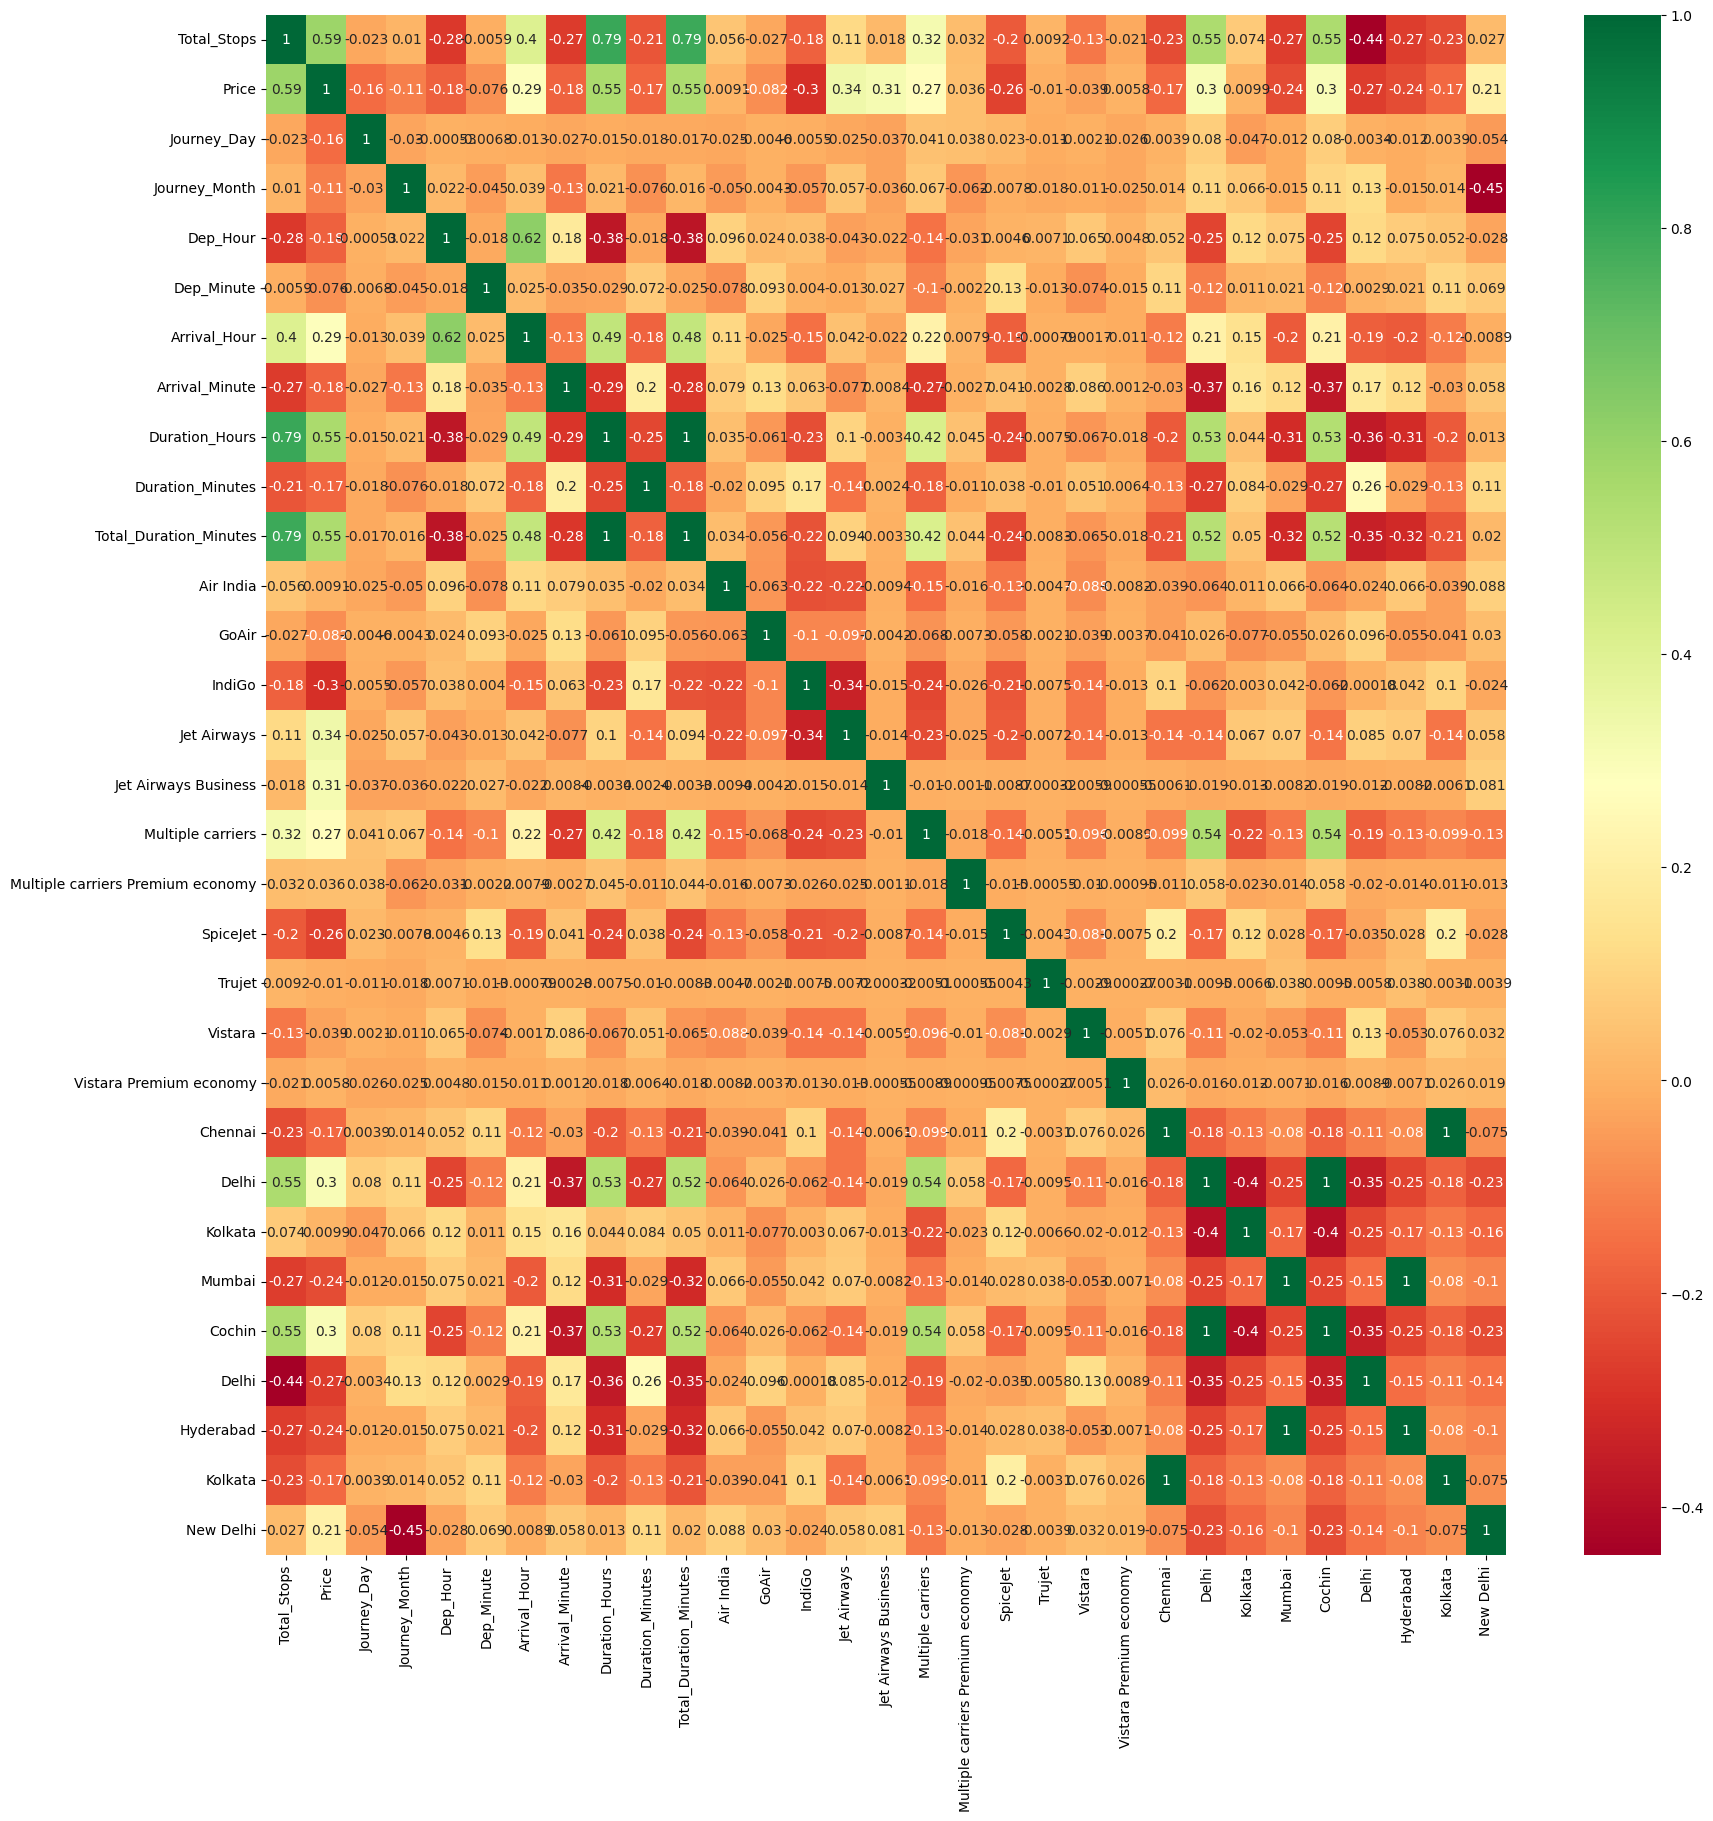

In [20]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")
plt.show()

# **Huấn Luyện Mô Hình Random Forest**

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Sau đó chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

In [22]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [23]:
pred = rfr.predict(X_test)

In [24]:
train_score = rfr.score(X_train, y_train)  # Độ chính xác trên tập huấn luyện
test_score = rfr.score(X_test, y_test)    # Độ chính xác trên tập kiểm tra
print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

Train Score: 0.957772171136768
Test Score: 0.7390279804540505


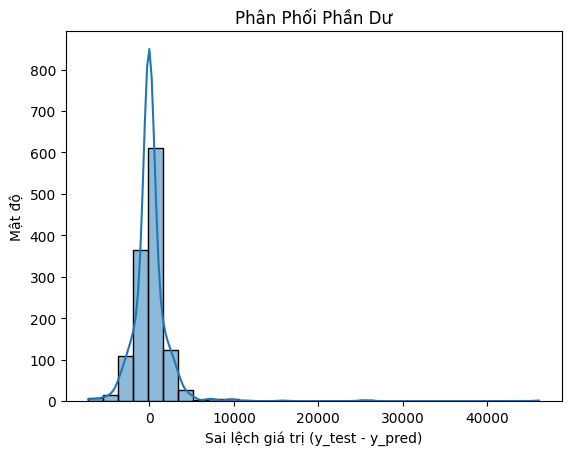

In [25]:
sns.histplot(y_test - pred, kde=True, bins=30)
plt.xlabel('Sai lệch giá trị (y_test - y_pred)')
plt.ylabel('Mật độ')
plt.title('Phân Phối Phần Dư')
plt.show()

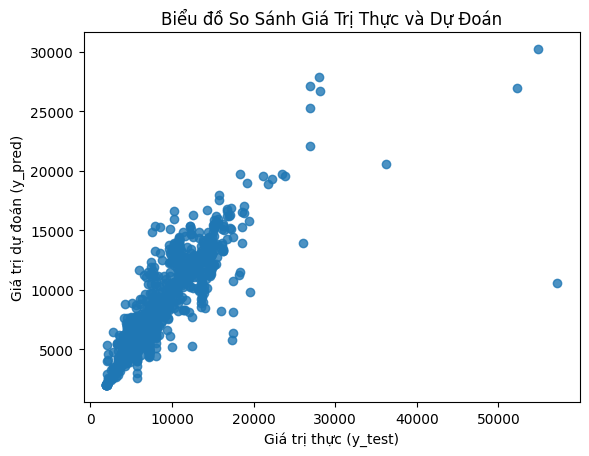

In [28]:
plt.scatter(y_test, pred, alpha=0.8)
plt.xlabel('Giá trị thực (y_test)')
plt.ylabel('Giá trị dự đoán (y_pred)')
plt.title('Biểu đồ So Sánh Giá Trị Thực và Dự Đoán')
plt.show()

In [26]:
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test, pred))
print("MSE:", metrics.mean_squared_error(y_test, pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, pred)))
print("R² Score:", metrics.r2_score(y_test, pred))

MAE: 1154.1719725476623
MSE: 5918761.489382004
RMSE: 2432.8504864421907
R² Score: 0.7390279804540505


# **Huấn Luyện Mô Hình Linear Regression**

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [28]:
# Khởi tạo mô hình Linear Regression
lr_model = LinearRegression()

# Huấn luyện mô hình trên tập dữ liệu huấn luyện
lr_model.fit(X_train, y_train)

# Dự đoán trên tập dữ liệu kiểm tra
lr_pred = lr_model.predict(X_test)

In [32]:
print(X_train[:5])  # Hiển thị 5 hàng đầu tiên của X_train

[[ 0.73340471  1.56585877  1.13836878 -1.69889631 -0.51809702  0.52340058
  -1.34650393  2.41506589  0.9864195   2.51439838 -0.3759203  -0.16787704
  -0.59505929  1.73569647 -0.0251101  -0.4074977  -0.04351941 -0.34551309
  -0.01255208 -0.23491737 -0.02174427 -0.2430207   1.32439156 -0.52948558
  -0.32811598  1.32439156 -0.464105   -0.32811598 -0.2430207  -0.31013502]
 [-0.95464936 -0.19077211 -0.57769985 -0.25861859 -1.32006725 -1.04070294
   0.05391663 -0.83132271 -0.20284805 -0.85650437 -0.3759203  -0.16787704
  -0.59505929 -0.5761376  -0.0251101  -0.4074977  -0.04351941  2.89424632
  -0.01255208 -0.23491737 -0.02174427 -0.2430207  -0.7550637   1.88862555
  -0.32811598 -0.7550637  -0.464105   -0.32811598 -0.2430207  -0.31013502]
 [ 2.42145879  0.51188025  0.28033446 -1.08163443  0.2838732   0.52340058
  -1.34650393  1.71941119  0.09446883  1.75006578 -0.3759203  -0.16787704
  -0.59505929  1.73569647 -0.0251101  -0.4074977  -0.04351941 -0.34551309
  -0.01255208 -0.23491737 -0.0217442

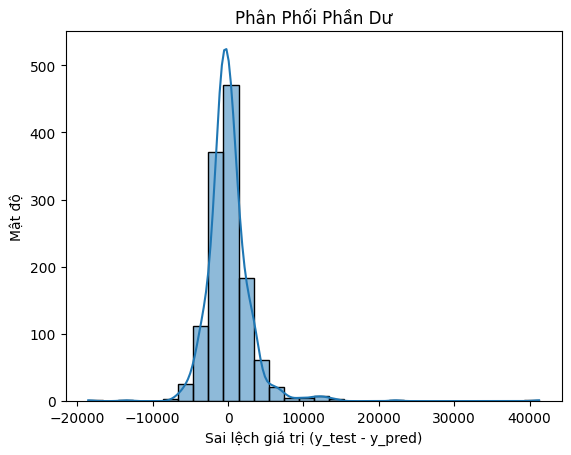

In [33]:
sns.histplot(y_test - lr_pred, kde=True, bins=30)
plt.xlabel('Sai lệch giá trị (y_test - y_pred)')
plt.ylabel('Mật độ')
plt.title('Phân Phối Phần Dư')
plt.show()

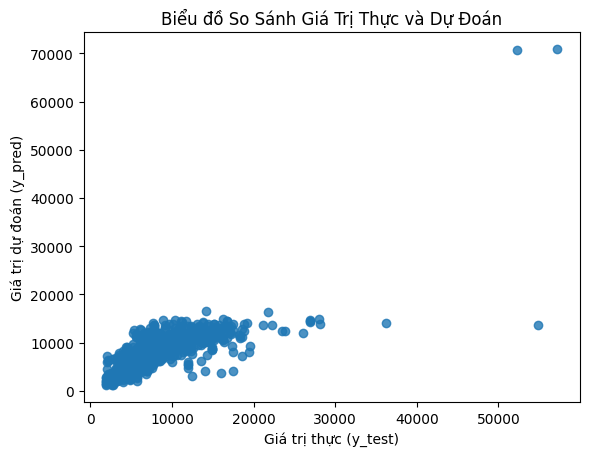

In [34]:
plt.scatter(y_test, lr_pred, alpha=0.8)
plt.xlabel('Giá trị thực (y_test)')
plt.ylabel('Giá trị dự đoán (y_pred)')
plt.title('Biểu đồ So Sánh Giá Trị Thực và Dự Đoán')
plt.show()

In [29]:
# Tính các chỉ số
mae = mean_absolute_error(y_test, lr_pred)
mse = mean_squared_error(y_test, lr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lr_pred)

# In kết quả
print("Linear Regression Results:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

Linear Regression Results:
MAE: 1889.2106331581656
MSE: 9086055.832622143
RMSE: 3014.308516496303
R² Score: 0.5993745744611447


# **Huấn Luyện Mô Hình XGBoost Regressor**

In [ ]:
!pip uninstall xgboost -y

Found existing installation: xgboost 2.1.3
Uninstalling xgboost-2.1.3:
  Successfully uninstalled xgboost-2.1.3


In [ ]:
!pip install xgboost --upgrade

  Using cached xgboost-2.1.3-py3-none-manylinux_2_28_x86_64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.3-py3-none-manylinux_2_28_x86_64.whl (153.9 MB)


In [4]:
!pip install scikit-learn==1.5.0

In [30]:
import xgboost
import sklearn
print("XGBoost version:", xgboost.__version__)
print("Scikit-learn version:", sklearn.__version__)

XGBoost version: 2.1.3
Scikit-learn version: 1.5.0


In [31]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
#xgb_model = XGBRegressor()
#xgb_model.fit(X_train, y_train)

# Chạy Cho CPU nếu không gặp lỗi "cuInit" not found
xgb_model = XGBRegressor(tree_method='hist')
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [32]:
# Dự đoán và đánh giá mô hình
xgb_pred = xgb_model.predict(X_test)

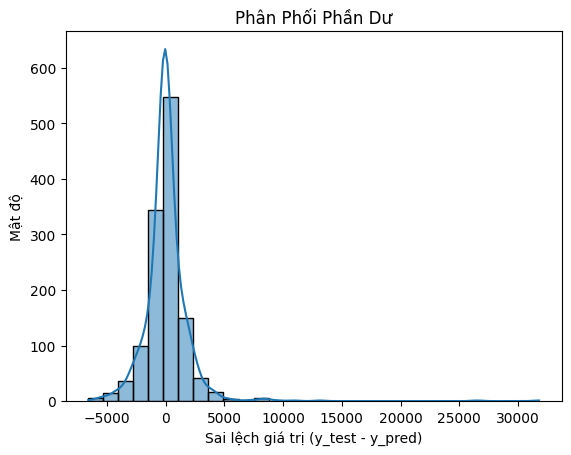

In [ ]:
sns.histplot(y_test - xgb_pred, kde=True, bins=30)
plt.xlabel('Sai lệch giá trị (y_test - y_pred)')
plt.ylabel('Mật độ')
plt.title('Phân Phối Phần Dư')
plt.show()

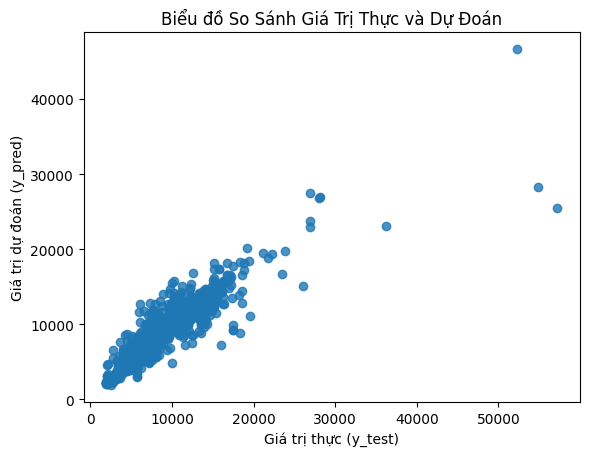

In [ ]:
plt.scatter(y_test, xgb_pred, alpha=0.8)
plt.xlabel('Giá trị thực (y_test)')
plt.ylabel('Giá trị dự đoán (y_pred)')
plt.title('Biểu đồ So Sánh Giá Trị Thực và Dự Đoán')
plt.show()

In [33]:
# Tính các chỉ số
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_pred)

print("XGBoost Regression Results:")
print(f"MAE: {xgb_mae}")
print(f"MSE: {xgb_mse}")
print(f"RMSE: {xgb_rmse}")
print(f"R² Score: {xgb_r2}")

XGBoost Regression Results:
MAE: 1097.759058290016
MSE: 4081742.1718933377
RMSE: 2020.3321934507053
R² Score: 0.8200264573097229


# **So Sánh Tổng Thể 3 Mô Hình**

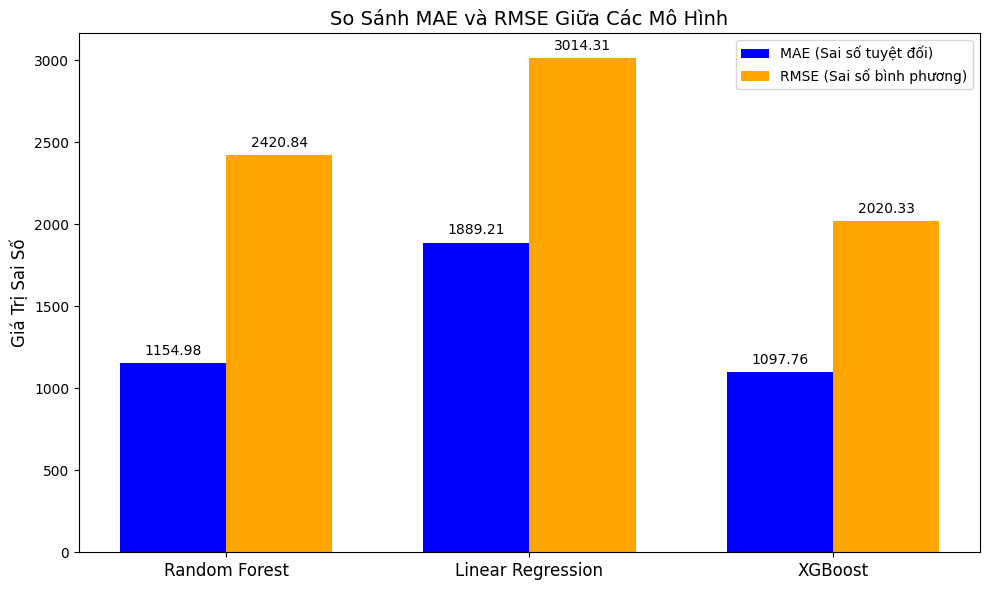

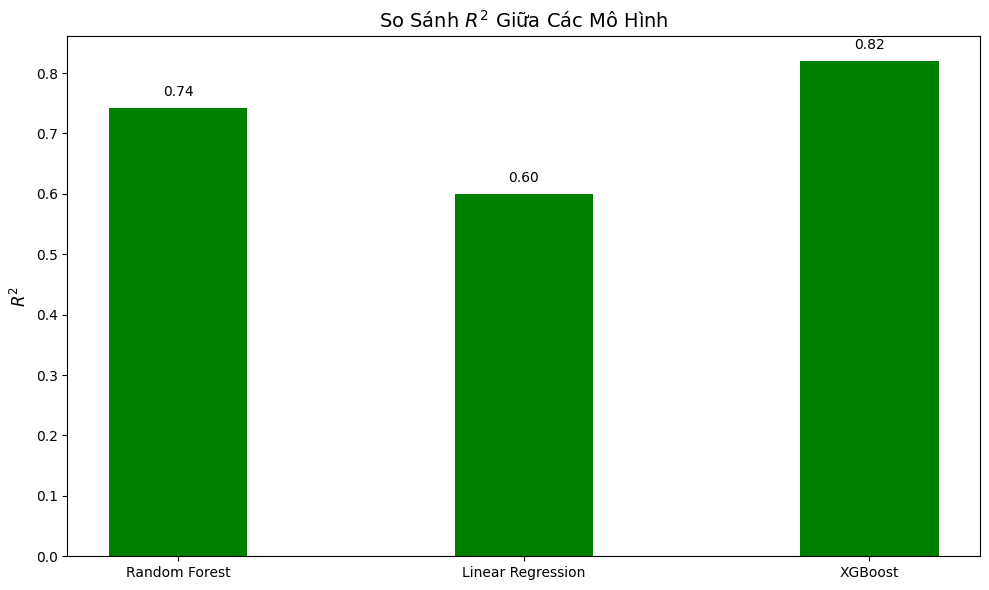

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu
mô_hình = ['Random Forest', 'Linear Regression', 'XGBoost']
MAE = [1154.98, 1889.21, 1097.76]
RMSE = [2420.84, 3014.31, 2020.33]
R2 = [0.7416, 0.5993, 0.8200]

# Biểu đồ 1: MAE và RMSE
x = np.arange(len(mô_hình))
chiều_rộng = 0.35
fig, ax1 = plt.subplots(figsize=(10, 6))

thanh1 = ax1.bar(x - chiều_rộng/2, MAE, chiều_rộng, label='MAE (Sai số tuyệt đối)', color='blue')
thanh2 = ax1.bar(x + chiều_rộng/2, RMSE, chiều_rộng, label='RMSE (Sai số bình phương)', color='orange')

# ax1.set_xlabel('Mô Hình', fontsize=12)
ax1.set_ylabel('Giá Trị Sai Số', fontsize=12)
ax1.set_title('So Sánh MAE và RMSE Giữa Các Mô Hình', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(mô_hình, fontsize=12)
ax1.legend()

for i, v in enumerate(MAE):
    ax1.text(i - chiều_rộng/2, v + 50, f"{v:.2f}", ha='center', fontsize=10)
for i, v in enumerate(RMSE):
    ax1.text(i + chiều_rộng/2, v + 50, f"{v:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Biểu đồ 2: R^2
fig, ax2 = plt.subplots(figsize=(10, 6))
thanh3 = ax2.bar(mô_hình, R2, color='green', width=0.4)

# ax2.set_xlabel('Mô Hình', fontsize=12)
ax2.set_ylabel('$R^2$', fontsize=12)
ax2.set_title('So Sánh $R^2$ Giữa Các Mô Hình', fontsize=14)

for i, v in enumerate(R2):
    ax2.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# **Biểu Đồ So Sánh Giá Của Các Mô Hình**

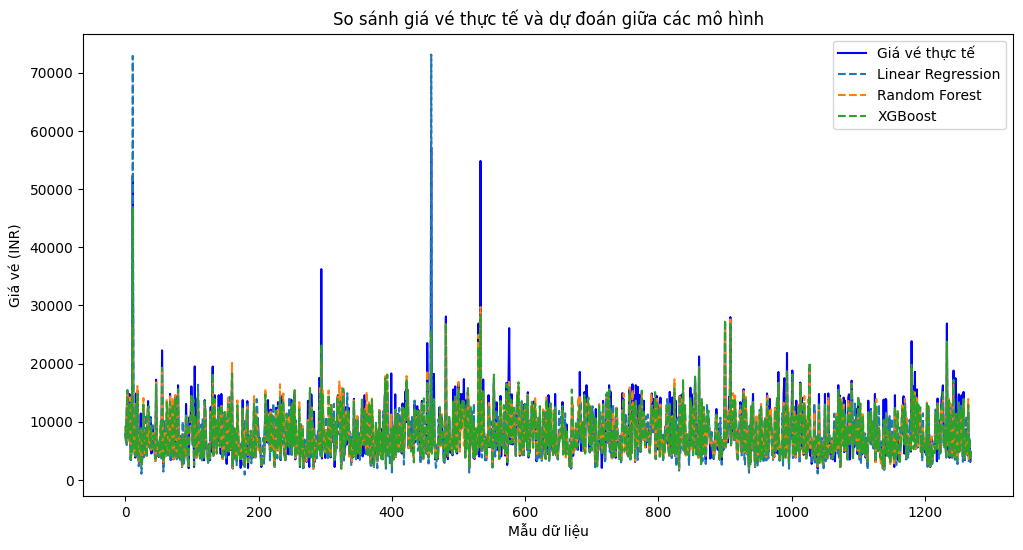

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Giá vé thực tế', color='blue')
plt.plot(lr_pred, label='Linear Regression', linestyle='dashed')
plt.plot(pred, label='Random Forest', linestyle='dashed')
plt.plot(xgb_pred, label='XGBoost', linestyle='dashed')

plt.title('So sánh giá vé thực tế và dự đoán giữa các mô hình')
plt.xlabel('Mẫu dữ liệu')
plt.ylabel('Giá vé (INR)')
plt.legend()
plt.show()

# **Mô Hình Hoàn Thiện**

In [ ]:
import joblib

# Lưu mô hình XGBoost
joblib.dump(xgb_model, "xgboost_model.pkl")

In [ ]:
from google.colab import files
files.download("xgboost_model.pkl")

In [ ]:
# In ra danh sách đặc trưng của dữ liệu huấn luyện
print("Danh sách đặc trưng của mô hình:")
print(X.columns)

*Flask API *

In [ ]:
#==================== Flask API ====================#
#.....................................................

# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1200, num=12)],  # Số lượng cây
    'max_features': ['sqrt', 'log2', None],  # Loại bỏ 'auto'
    'max_depth': [int(x) for x in np.linspace(5, 30, num=6)],  # Độ sâu của cây
    'min_samples_split': [2, 5, 10],  # Số lượng mẫu tối thiểu để tách
    'min_samples_leaf': [1, 2, 4]  # Số mẫu tối thiểu ở nút lá
}

# Tạo RandomizedSearchCV
rfr = RandomForestRegressor()
rfr_random = RandomizedSearchCV(
    estimator=rfr,
    param_distributions=param_grid,
    scoring='neg_mean_squared_error',
    n_iter=50,  # Giảm số lần thử nghiệm để tăng tốc độ
    cv=3,  # Cross-validation với 3 lần chia tập dữ liệu
    verbose=2,
    random_state=42,
    n_jobs=-1  # Sử dụng tất cả các CPU
)

# Huấn luyện với dữ liệu
rfr_random.fit(X_train, y_train)

In [ ]:
print("Best Parameters:", rfr_random.best_params_)

In [ ]:
best_model = rfr_random.best_estimator_
predictions = best_model.predict(X_test)

In [ ]:
plt.figure(figsize=(8, 8))
sns.histplot(y_test - predictions, kde=True, bins=30)
plt.title("Error Distribution")
plt.xlabel("Error")
plt.ylabel("Density")
plt.show()

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, predictions, alpha=0.8)
plt.title("Predictions vs True Values")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

In [ ]:
print("Mean Absolute Error (MAE):", metrics.mean_absolute_error(y_test, predictions))
print("Mean Squared Error (MSE):", metrics.mean_squared_error(y_test, predictions))
print("Root Mean Squared Error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("R2 Score:", metrics.r2_score(y_test, predictions))

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=rfr_random.best_estimator_,
    X=X_train, y=y_train, cv=5,
    scoring='neg_mean_squared_error', n_jobs=-1)

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(8, 8))
plt.plot(train_sizes, train_mean, label='Training Error', marker='o')
plt.plot(train_sizes, test_mean, label='Validation Error', marker='o')
plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.title('Learning Curve')
plt.legend()
plt.show()